# Analiza Produktów
Załadowanie biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Połączenie z bazą SQL

In [2]:
conn = pyodbc.connect ('DRIVER={SQL Server};SERVER=WIN-KNV22QSAF5I\PRACA_DYPLOMOWA;DATABASE=AdventureWorks2017;Trusted_Connection=yes;')

# Załadowanie danych

In [4]:
query = "SELECT * FROM ProductView"

pv = pd.read_sql(query, conn)
pd.options.display.float_format = '${:,.2f}'.format
print(pv.head())
pv.head()

   ProductID ProductNumber              ProductName   Color  \
0        776    BK-M82B-42   Mountain-100 Black, 42   Black   
1        777    BK-M82B-44   Mountain-100 Black, 44   Black   
2        778    BK-M82B-48   Mountain-100 Black, 48   Black   
3        771    BK-M82S-38  Mountain-100 Silver, 38  Silver   
4        772    BK-M82S-42  Mountain-100 Silver, 42  Silver   

  ProductSubCategory ProductCategory  SalesOrderDetailID  CustomerID  \
0     Mountain Bikes           Bikes                   1       29825   
1     Mountain Bikes           Bikes                   2       29825   
2     Mountain Bikes           Bikes                   3       29825   
3     Mountain Bikes           Bikes                   4       29825   
4     Mountain Bikes           Bikes                   5       29825   

  PersonType   StoreID         StoreName        Country  SalesOrderID  \
0         SC $1,046.00  Better Bike Shop  United States         43659   
1         SC $1,046.00  Better Bike Shop  

,ProductID,ProductNumber,ProductName,Color,ProductSubCategory,ProductCategory,SalesOrderDetailID,CustomerID,PersonType,StoreID,StoreName,Country,SalesOrderID,OrderDate,DueDate,ShipDate,UnitPrice,OrderQty,UnitPriceDiscount,LineTotal
0,776,BK-M82B-42,"Mountain-100 Black, 42",Black,Mountain Bikes,Bikes,1,29825,SC,"$1,046.00",Better Bike Shop,United States,43659,2011-05-31,2011-06-12,2011-06-07,"$2,024.99",1,$0.00,"$2,024.99"
1,777,BK-M82B-44,"Mountain-100 Black, 44",Black,Mountain Bikes,Bikes,2,29825,SC,"$1,046.00",Better Bike Shop,United States,43659,2011-05-31,2011-06-12,2011-06-07,"$2,024.99",3,$0.00,"$6,074.98"
2,778,BK-M82B-48,"Mountain-100 Black, 48",Black,Mountain Bikes,Bikes,3,29825,SC,"$1,046.00",Better Bike Shop,United States,43659,2011-05-31,2011-06-12,2011-06-07,"$2,024.99",1,$0.00,"$2,024.99"
3,771,BK-M82S-38,"Mountain-100 Silver, 38",Silver,Mountain Bikes,Bikes,4,29825,SC,"$1,046.00",Better Bike Shop,United States,43659,2011-05-31,2011-06-12,2011-06-07,"$2,039.99",1,$0.00,"$2,039.99"
4,772,BK-M82S-42,"Mountain-100 Silver, 42",Silver,Mountain Bikes,Bikes,5,29825,SC,"$1,046.00",Better Bike Shop,United States,43659,2011-05-31,2011-06-12,2011-06-07,"$2,039.99",1,$0.00,"$2,039.99"


# Statystyki podstawowe

In [5]:
describe_pv = pv.filter(['UnitPrice', 'OrderQty', 'UnitPriceDiscount', 'LineTotal'])
describe_pv.describe()

,UnitPrice,OrderQty,UnitPriceDiscount,LineTotal
count,"$121,317.00","$121,317.00","$121,317.00","$121,317.00"
mean,$465.09,$2.27,$0.00,$905.45
std,$751.89,$2.49,$0.02,"$1,693.42"
min,$1.33,$1.00,$0.00,$1.37
25%,$21.49,$1.00,$0.00,$24.99
50%,$49.99,$1.00,$0.00,$134.98
75%,$602.35,$3.00,$0.00,"$1,120.49"
max,"$3,578.27",$44.00,$0.40,"$27,893.62"


# Statystyki w podziale na grupy

In [20]:
ProductCategory_sum = pv.filter([ 'ProductCategory', 'LineTotal']).groupby('ProductCategory').sum()
ProductCategory_sum = countryP_sum.reset_index()
ProductCategory_sum


,index,ProductCategory,LineTotal
0,0,Accessories,"$1,272,072.88"
1,1,Bikes,"$94,651,172.70"
2,2,Clothing,"$2,120,542.52"
3,3,Components,"$11,802,593.29"


Text(0, 0.5, 'in millions')

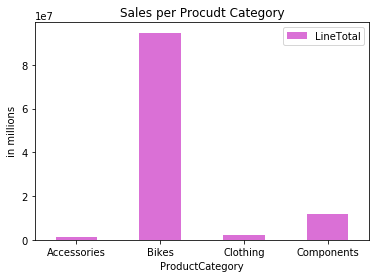

In [30]:
ProductCategory_sum.plot.bar (x = 'ProductCategory', y = 'LineTotal', rot = 0, color = 'orchid')
plt.legend()
plt.title('Sales per Procudt Category')
plt.ylabel('in millions')

In [23]:
ProductSubCategory = pv.filter(['ProductSubCategory', 'LineTotal']).groupby ('ProductSubCategory').sum()
ProductSubCategory = ProductSubCategory.reset_index()
ProductSubCategory

,ProductSubCategory,LineTotal
0,Bib-Shorts,"$167,558.62"
1,Bike Racks,"$237,096.16"
2,Bike Stands,"$39,591.00"
3,Bottles and Cages,"$64,274.79"
4,Bottom Brackets,"$51,826.37"
5,Brakes,"$66,018.71"
6,Caps,"$51,229.45"
7,Chains,"$9,377.71"
8,Cleaners,"$18,406.97"
9,Cranksets,"$203,942.62"


Text(0, 0.5, 'in millions')

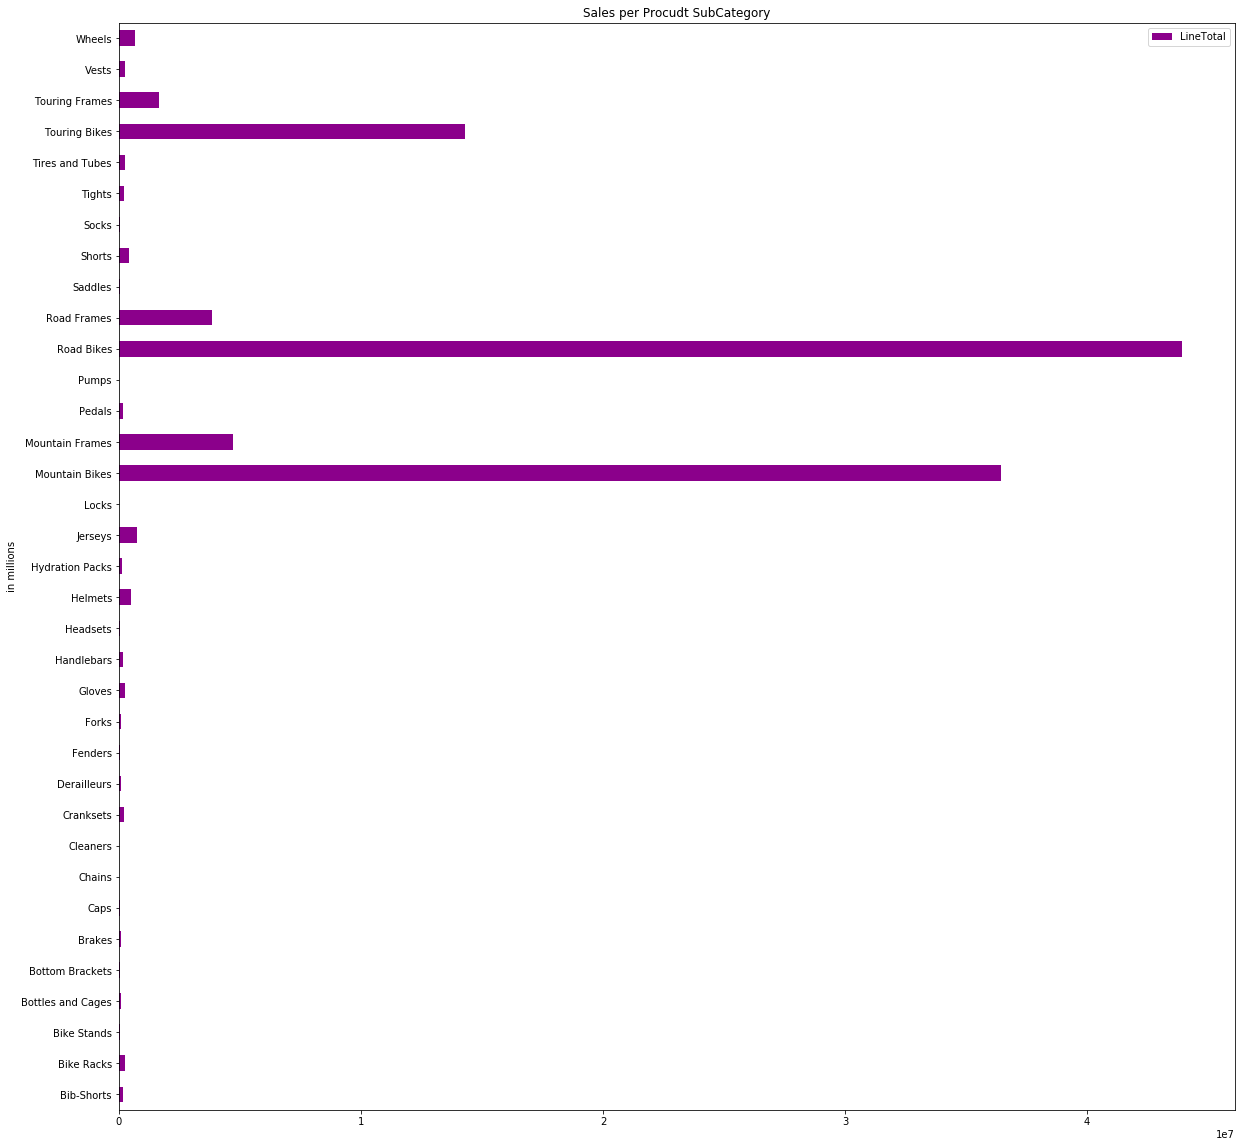

In [31]:
ProductSubCategory.plot.barh (x = 'ProductSubCategory', y = 'LineTotal', rot = 0, color = 'darkmagenta', figsize = (20, 20))
plt.legend()
plt.title('Sales per Procudt SubCategory')
plt.ylabel('in millions')

In [41]:
BikesPerColor = pv.filter(['Color', 'ProductCategory', 'LineTotal'])
BikesPerColor = BikesPerColor [BikesPerColor['ProductCategory'] == 'Bikes']
BikesPerColorGrouped = BikesPerColor.groupby (['Color', 'ProductCategory']).sum()
BikesPerColorGrouped = BikesPerColorGrouped.reset_index()
BikesPerColorGrouped

,Color,ProductCategory,LineTotal
0,Black,Bikes,"$33,135,870.15"
1,Blue,Bikes,"$8,374,313.88"
2,Red,Bikes,"$19,784,772.19"
3,Silver,Bikes,"$17,005,080.84"
4,Yellow,Bikes,"$16,351,135.65"


Text(0, 0.5, 'in millions')

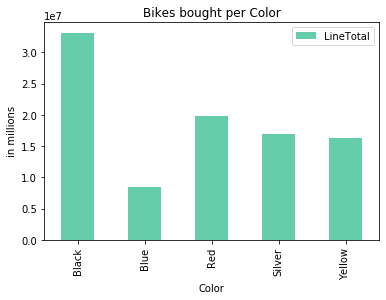

In [46]:
BikesPerColorGrouped.plot.bar (x = 'Color', y =  'LineTotal', color = 'mediumaquamarine')
plt.legend()
plt.title('Bikes bought per Color')
plt.ylabel('in millions')